# Data Understanding

<b>This dataset belongs to Showwcase which is an online platform where members of the tech community connect, share their knowledge, work experiences, projects built, people they've worked with and find new opportunities. Every time a user logs into their Showwcase account, a new session begins. </b> </n>

<b> This dataset consists of users sessions data for last month (October 2019). </b>

<img src="https://media-exp1.licdn.com/dms/image/C561BAQH2JcyJX07Zgg/company-background_10000/0?e=2159024400&v=beta&t=mn-RgE23PsEbK416864K-efl7XRzqDsV0bCOwvwWBhU">

<blockquote><b><i> The objective of this notebook is to better understand User Engagement at Showwcase platform through data analysis. </i></b></blockquote>

<b>This dataset has this following attributes: </b> </n>

<ul>  
<li>session_id → unique identification number for each session</li>
<li>customer_id → unique identification number for each customer</li>
<li>login_date → the date the user logged into Showwcase for that session</li>
<li>projects_added → boolean if at least one project was added</li>
<li>likes_given → boolean if at least one like was given</li>
<li>comment_given → boolean if at least one comment was given</li>
<li>inactive_status → boolean if the user was inactive or idle</li>
<li>bugs_occurerd → boolean if a user ran into at least one bug</li>
<li>session_projects_added → number of projects added</li>
<li>session_likes_given → number of likes given</li>
<li>session_comments_given → number of comments given</li>
<li>inactive_duration → number of seconds a user was inactive or idle</li>
<li>bugs_in_session → number of bugs a user ran into</li>
<li>session_duration → number of seconds a user was logged for that session</li>
</ul>

# Data Wrangling - Gathering -

In [2]:
# Importing libiraies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the dataset from CSV file
sessions = pd.read_csv('showwcase_sessions.csv')
sessions.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


# Data Wrangling - Assessing -

In [4]:
# Shape of the dataset.
sessions.shape

(302, 14)

In [4]:
# Information about attributes null values and datatypes.
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
session_id                300 non-null float64
customer_id               300 non-null float64
login_date                300 non-null object
projects_added            300 non-null object
likes_given               300 non-null object
comment_given             300 non-null object
inactive_status           300 non-null object
bug_occured               300 non-null object
session_projects_added    300 non-null float64
session_likes_given       299 non-null float64
session_comments_given    300 non-null float64
inactive_duration         300 non-null float64
bugs_in_session           300 non-null float64
session_duration          300 non-null float64
dtypes: float64(8), object(6)
memory usage: 33.2+ KB


In [21]:
# All rows have at least NAN value.
sessions[sessions.isnull().any(axis=1)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# ALl duplicated rows.
sessions[sessions.duplicated()]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Number of unique values of each attribute.
sessions.nunique()

session_id                300
customer_id                48
login_date                 30
projects_added              2
likes_given                 2
comment_given               2
inactive_status             2
bug_occured                 2
session_projects_added      8
session_likes_given        28
session_comments_given      9
inactive_duration         170
bugs_in_session             6
session_duration          279
dtype: int64

In [10]:
# Number of unique values of Cutomer_ID attribute.
sessions['customer_id'].nunique()

48

In [32]:
sessions.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.423333,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.478234,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


<b>Results of Assessing: </b> 
<ul>  
<li>There are 2 missing vlaues in all attributes and 2 duplicated rows -Because of last 2 NAN rows-</li>
<li>There is a missing value in row 35 for 'session_likes_given' attribute</li>
<li>'login_date' and all boolean attributes are object datatypes</li>
</ul>

<b>Notes:</b>
<ul>
<li>These seesions data are for 48 unique cutomers</li>
<li>Average number of projects added per session is 1.5 projects</li>
<li>Average number of likes and comments given per session is 10 likes and 2 comments</li>
<li>Average duration of session is 1187 second (Nearly 20 minutes)</li>
</ul>

# Data Wrangling - Cleaning - 
### Let's fix these issues that we've listed in data assessing phase:

<img src="https://media.giphy.com/media/kXBVtKjLxINji/giphy.gif">

#### Drop last 2 rows as they have NAN vlaues.

In [5]:
sessions.drop([300 , 301] , inplace=True)
sessions.tail()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
295,944212.0,40572.0,10/1/19,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332.0,87323.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0


#### As the only NAN value in row 35 and attribute 'session_likes_given', row 35 'likes_given' attribute value is FALSE. So, we're going to fill this value with 0.0

In [6]:
sessions.fillna(0.0, inplace=True)

#### Check that there is no null values. 

In [7]:
sessions.isnull().sum()

session_id                0
customer_id               0
login_date                0
projects_added            0
likes_given               0
comment_given             0
inactive_status           0
bug_occured               0
session_projects_added    0
session_likes_given       0
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

#### Fix 'login_date' attribute datatype, convert it to datetime datatype.

In [8]:
sessions['login_date'] =  pd.to_datetime(sessions['login_date'], format="%m/%d/%y")
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 14 columns):
session_id                300 non-null float64
customer_id               300 non-null float64
login_date                300 non-null datetime64[ns]
projects_added            300 non-null bool
likes_given               300 non-null bool
comment_given             300 non-null bool
inactive_status           300 non-null bool
bug_occured               300 non-null bool
session_projects_added    300 non-null float64
session_likes_given       300 non-null float64
session_comments_given    300 non-null float64
inactive_duration         300 non-null float64
bugs_in_session           300 non-null float64
session_duration          300 non-null float64
dtypes: bool(5), datetime64[ns](1), float64(8)
memory usage: 24.9 KB


# Exploratory Data Analysis (EDA)
### Let's answer some questions in order to better understand user engagement.

<img src="https://media.giphy.com/media/wH4rY2nPnEnp6/giphy.gif">

#### First questions to answer, What is the distributions of sessions based on 'projects_added', 'likes_given' and 'comment_given' attributes?

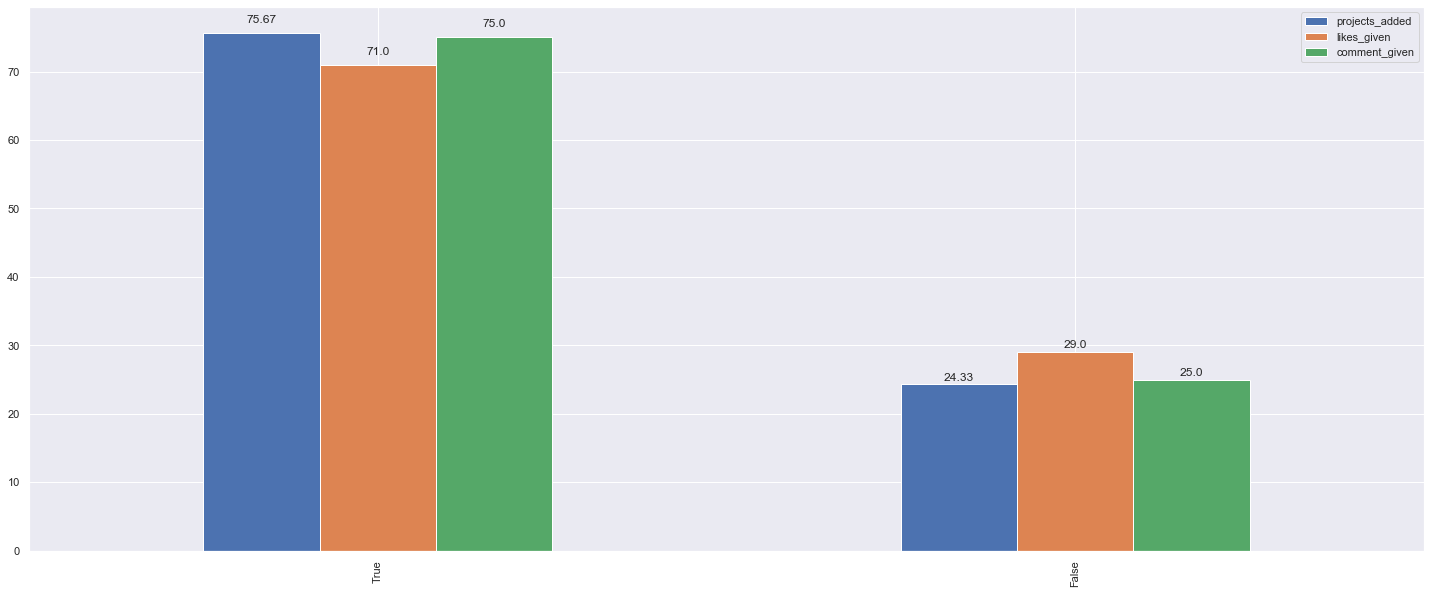

In [208]:
df = sessions[['projects_added', 'likes_given', 'comment_given']]
df1 = round( df.apply(pd.value_counts, normalize=True)*100 , 2)
ax = df1.plot.bar()
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

#### What is sessions numbers across time? To answer this questions, let's visualize the number of sessions per each day.

In [209]:
sessions_copy = sessions.drop(['projects_added', 'likes_given', 'comment_given', 'inactive_status', 'bug_occured'], axis = 1)
df = sessions_copy.groupby(['login_date']).count()

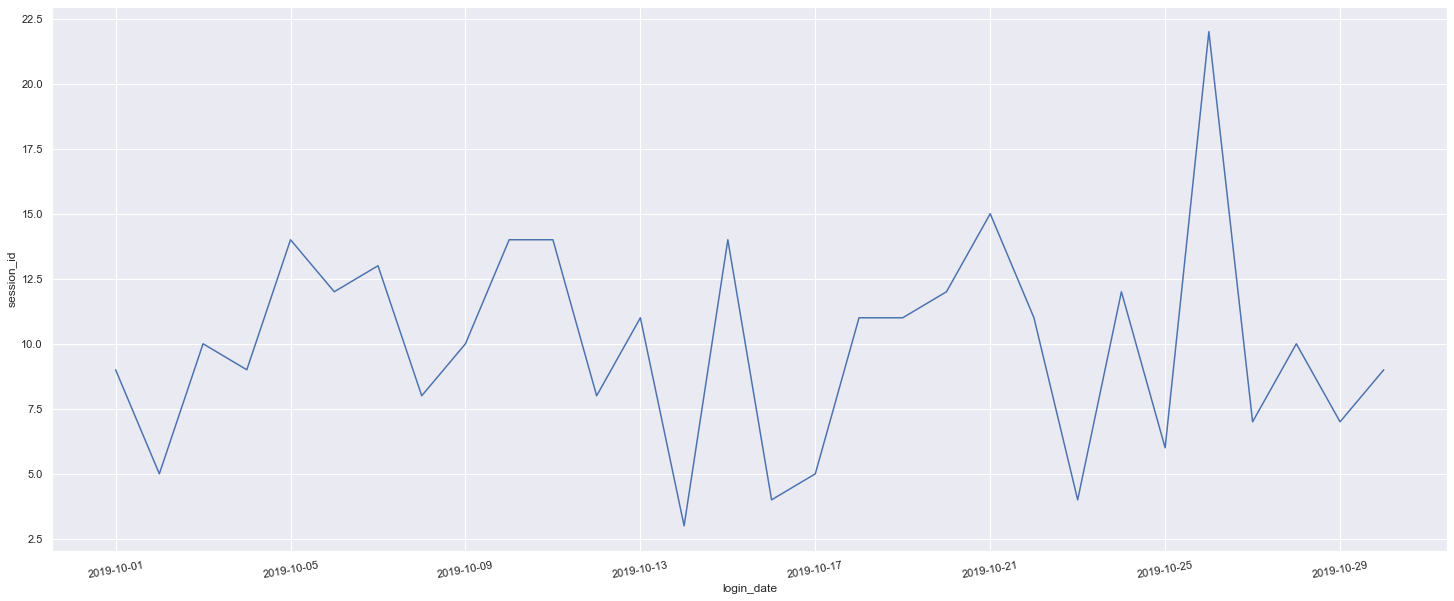

In [210]:
sns.set(rc={'figure.figsize':(25,10)})
axdate = sns.lineplot(x=df.index, y='session_id', data=df, sort=True)
for item in axdate.get_xticklabels():
    item.set_rotation(10)

#### What is the correlation between some attributes like number of project, number of likes, number of comments, duration?

In [48]:
sessions_copy = sessions_copy.drop(['session_id','customer_id'], axis = 1)

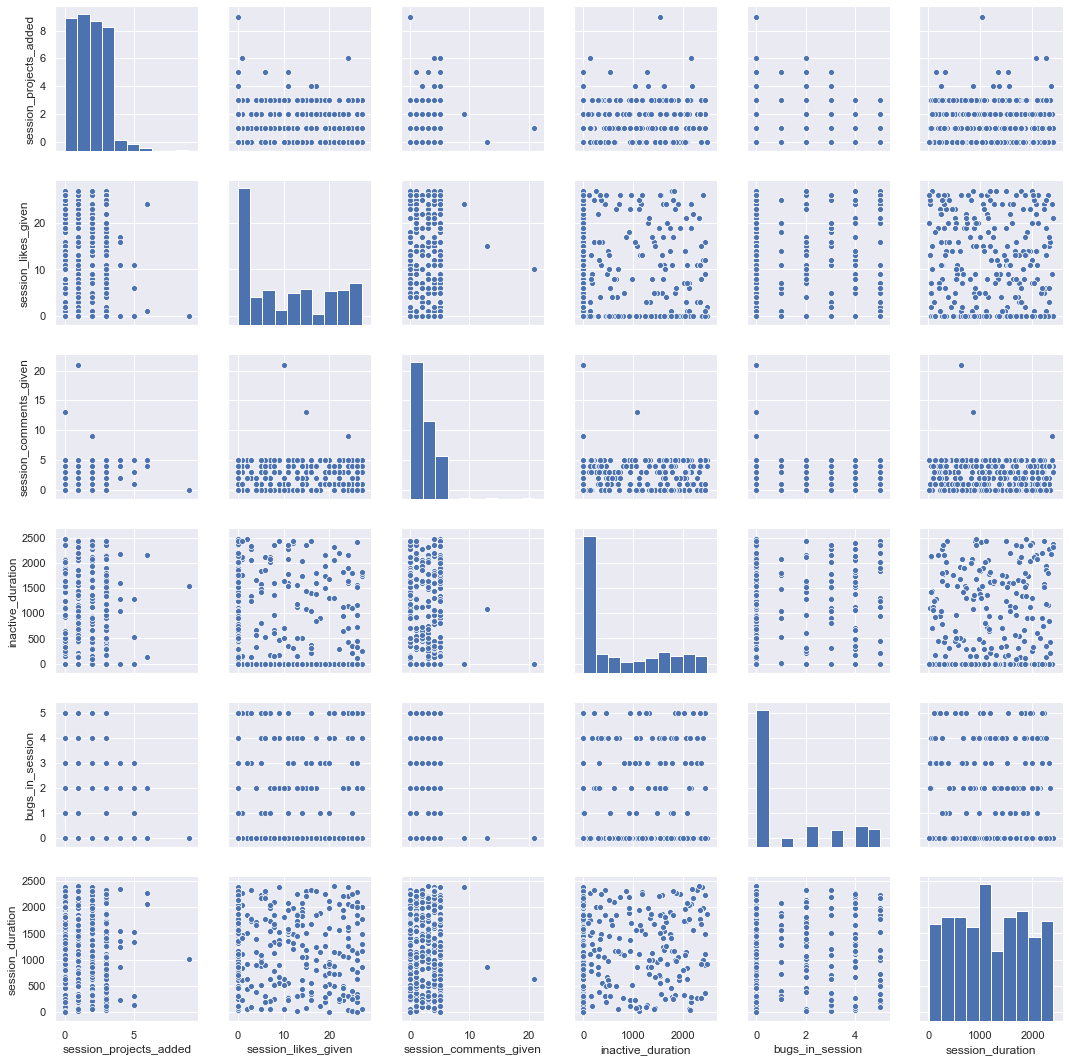

In [46]:
sns.pairplot(sessions_copy)

#### What is the distribution of user engagement (adding projects, giving likes and comments) in weekdays?!

In [52]:
sessions_copy = sessions.copy()
sessions_copy['day'] = sessions_copy['login_date'].dt.strftime("%A")
t = sessions_copy.groupby(['day']).sum()
t

,session_id,customer_id,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
day,,,,,,,,,,,,,
Friday,24564012.0,1628942.0,27.0,32.0,28.0,21.0,7.0,55.0,462.0,89.0,22380.0,19.0,44850.0
Monday,20456395.0,1846441.0,33.0,32.0,32.0,18.0,14.0,61.0,495.0,100.0,28893.0,41.0,46720.0
Saturday,31601241.0,2349334.0,39.0,39.0,44.0,28.0,22.0,90.0,654.0,124.0,36954.0,75.0,67365.0
Sunday,19829057.0,2252994.0,31.0,30.0,37.0,31.0,28.0,66.0,468.0,109.0,35029.0,90.0,53287.0
Thursday,18704145.0,1871741.0,31.0,31.0,31.0,20.0,18.0,69.0,324.0,111.0,30561.0,52.0,43761.0
Tuesday,26209897.0,2058159.0,39.0,29.0,31.0,33.0,17.0,77.0,440.0,98.0,37966.0,58.0,55039.0
Wednesday,17828242.0,1479419.0,27.0,20.0,22.0,21.0,10.0,68.0,284.0,91.0,28097.0,35.0,45007.0


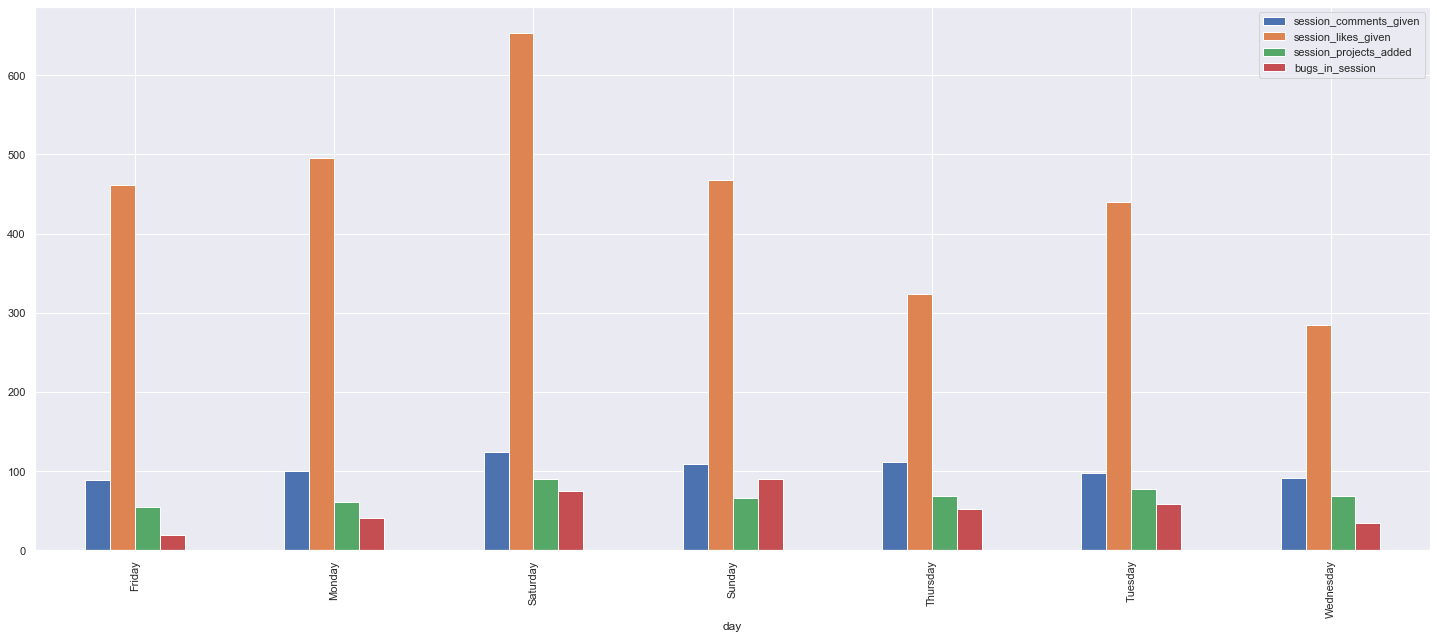

In [93]:
t.plot( y=['session_comments_given', 'session_likes_given', 'session_projects_added','bugs_in_session'], kind="bar")

#### We've noticed through asssessing phase that these sessions data are for 48 unique users.
#### So, what is the average, median and most frequent number of sessions per user?

The most frequent number of sessions per user is: 1 Sessions


count    48.000000
mean      6.250000
std       6.061739
min       1.000000
25%       1.000000
50%       4.500000
75%       8.000000
max      22.000000
Name: session_id, dtype: float64

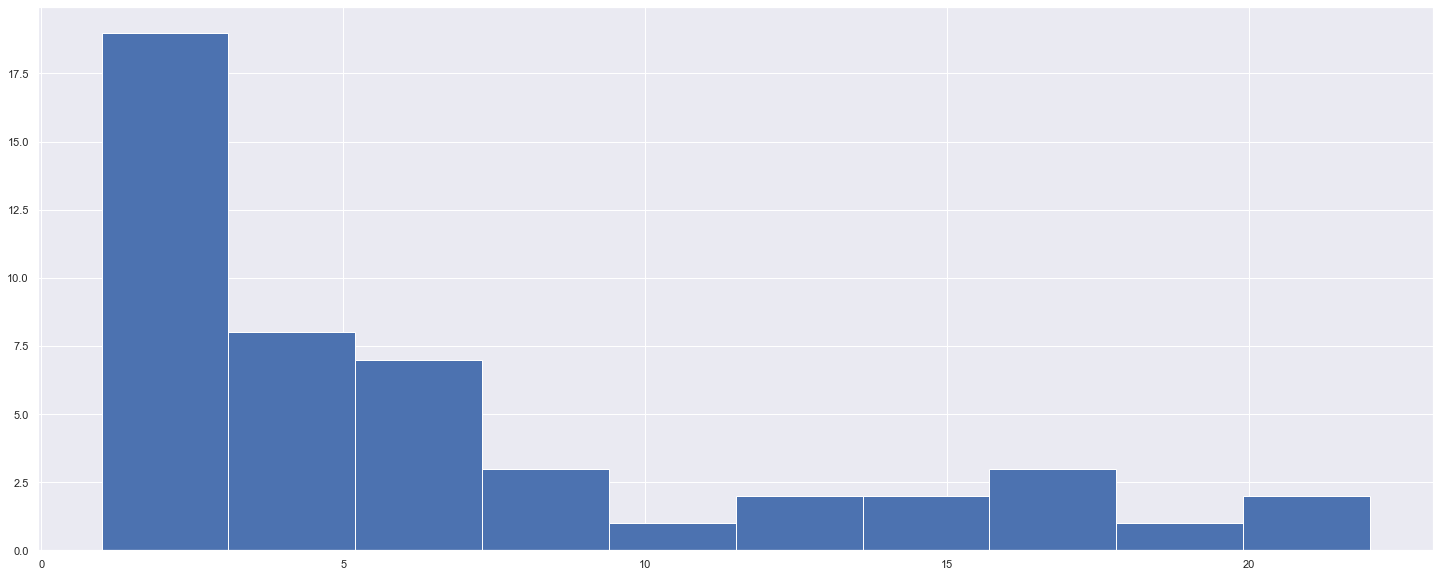

In [88]:
customers = sessions.groupby('customer_id').count()
mode = customers['session_id'].mode()[0]
print('The most frequent number of sessions per user is:', str(mode),'Sessions')
customers['session_id'].hist()
customers['session_id'].describe()

#### What about other attributes like number of projects, likes, comments and bugs?! What is the average, median and most frequent number of them per user?

In [165]:
customers = sessions.groupby('customer_id').sum()
customers = customers.drop(['session_id','projects_added', 'likes_given', 'comment_given', 'inactive_status', 'bug_occured'], axis = 1)
des = customers.describe()
des.loc[['mean','50%','max'], :]

,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,active
mean,10.125,65.145833,15.041667,4580.833333,7.708333,7417.270833,2836.4375
50%,7.500,46.000000,11.500000,2830.000000,5.000000,5694.500000,1384.0000
max,38.000,230.000000,64.000000,16527.000000,33.000000,30356.000000,18489.0000


In [211]:
# Get the most frequent number of projects, likes and comments per user.
customers.mode().iloc[0, :-2]

session_projects_added    3.0
session_likes_given       0.0
session_comments_given    0.0
inactive_duration         0.0
bugs_in_session           0.0
Name: 0, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213398219C8>,
      dtype=object)

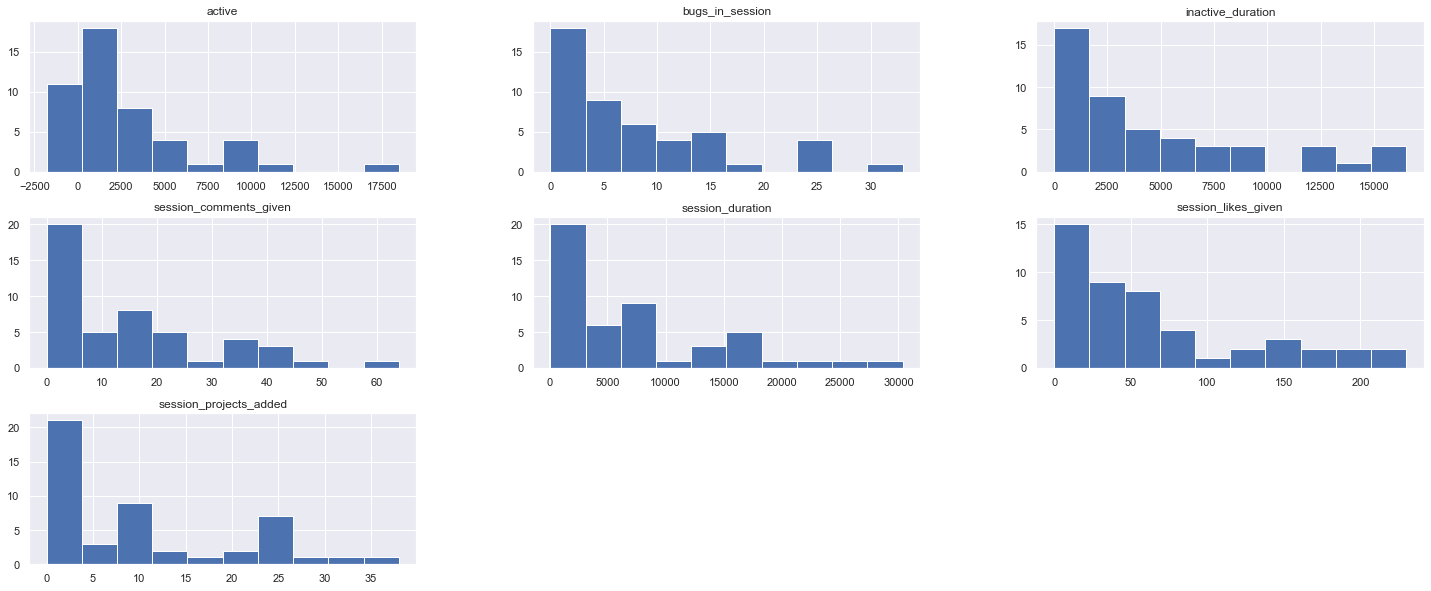

In [156]:
# Draw some histograms to see the distribution of atrributes per user
customers.hist()

# Conclusion
### Based on last phase's -EDA- answers, there are some points that helps us to better understand user engagement in Showwcase platform.

### This dataset has this following attributes:

<ul>  
    <li><b>Average number of projects added per session is 1.5 projects</b></li>
    <li><b>Average number of likes and comments given per session is 10 likes and 2 comments</b></li>
    <li><b>Average duration of session is 1187 seconds (Nearly 20 minutes)</b></li>
    <li><b> Number of sessions are high in weekends (Saturdays and Sundays)</b></li>
    <li><b>User engagement (Adding Projects, likes and comments) are the highest in Saturdays</b></li>
    <li><b>Most frequent number of sessions is 1 session per user</b></li>
    <li><b>Most frequent number of projects is 3 Projects per user</b></li>
    <li><b>Most frequent number of likes and comment per user is 0</b></li>
    <li><b>Average number of sessions per user is 6 sessions</b></li>
    <li><b>Average number of projects per user is 10 projces</b></li>
    <li><b>Average number of likes and comments given per user is 65 likes and 15 comments</b></li>
    <li><b>Average duration per user using the platform this month is 7417 seconds (nearly 2 hours)</b></li>
    <li><b>The maximum number of sessions per user this month is 22 sessions</b></li>
    <li><b>The maximum number of projects added per user this month is 38 projects</b></li>
    <li><b>The maximum number of likes per user this month is 230 likes</b></li>
    <li><b>The maximun duration per user using the platform this month is 30356 seconds (nearly 8.5 hours)</b></li>
</ul>

<img src="https://media.giphy.com/media/PSBsUwcZmQ9UI/giphy.gif">